# **Credit Card fraud detection**

# **01. Importing Libraries**
- We need to import the relevant libraries

In [17]:
#Libraries for Data Manipulation 
import pandas as pd
import numpy as np

#Libraries for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.gridspec as gridspec 
import plotly.offline as py
pd.options.plotting.backend = 'plotly'
from plotly.subplots import make_subplots

#Other Libraries
import warnings
warnings.filterwarnings("ignore")


In [48]:
#Libraries from Sklearn
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

- We import the dataset

In [4]:
df= pd.read_csv(r'creditcard_ML.csv', index_col=0)#As there is a time column we take it as index

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **02. Understanding the data**

In [6]:
df.describe()# We understand the statistics 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()# here we understand the datatypes, null values, count of each variable and the columns and  rows

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

In [8]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [9]:
df.isnull().sum()# finding the null values in each column

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
print(df['Class'].value_counts()/len(df['Class']*100))

0    0.998273
1    0.001727
Name: Class, dtype: float64


# **03. Exploratory Data Analysis**

<AxesSubplot:xlabel='Time'>

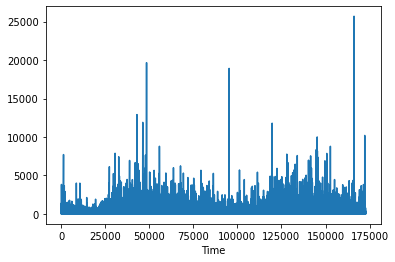

In [12]:
df['Amount'].plot()

Text(0.5, 1.0, 'Fraud Distribution \n (0: Fraud not detected || 1: Fraud Detected)')

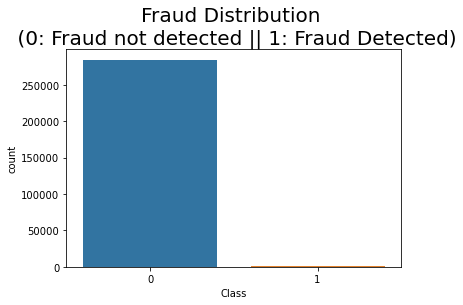

In [13]:
sns.countplot('Class', data=df)
plt.title('Fraud Distribution \n (0: Fraud not detected || 1: Fraud Detected)', fontsize=20)

In [14]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
print(df.shape)
print(df.columns)

(284807, 30)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


### **Data Visualization**
- Plotting a graph of all variables to understand the outliers, varitions
- plotly graphs are interactive and hence each variable can be verified seperatly and inconjunction with other variables

In [18]:
py.plot(df.iloc[0:,0:28].plot(), auto_open=True, filename='ALL variables of credit card.html')

'ALL variables of credit card.html'

In [32]:
py.plot(df[['Amount', 'Class']].plot(), auto_open=True, filename='amount and Class.html')

'amount and Class.html'

<function matplotlib.pyplot.show(close=None, block=None)>

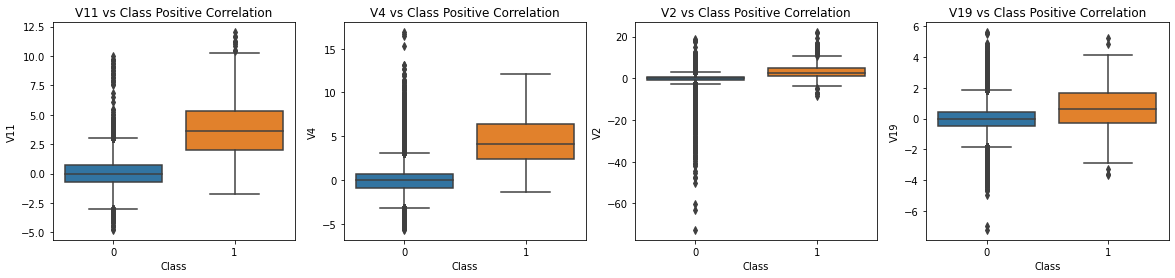

In [76]:
figure, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class",y="V11",data = df,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class",y="V4",data = df,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V2",data = df,ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V19",data = df,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

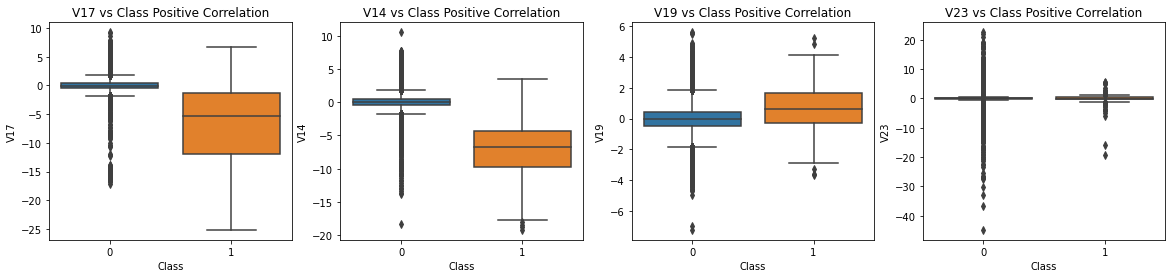

In [78]:
figure, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class",y="V17",data = df,ax=axes[0])
axes[0].set_title('V17 vs Class Positive Correlation')


sns.boxplot(x="Class",y="V14",data = df,ax=axes[1])
axes[1].set_title('V14 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V19",data = df,ax=axes[2])
axes[2].set_title('V19 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V23",data = df,ax=axes[3])
axes[3].set_title('V23 vs Class Positive Correlation')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

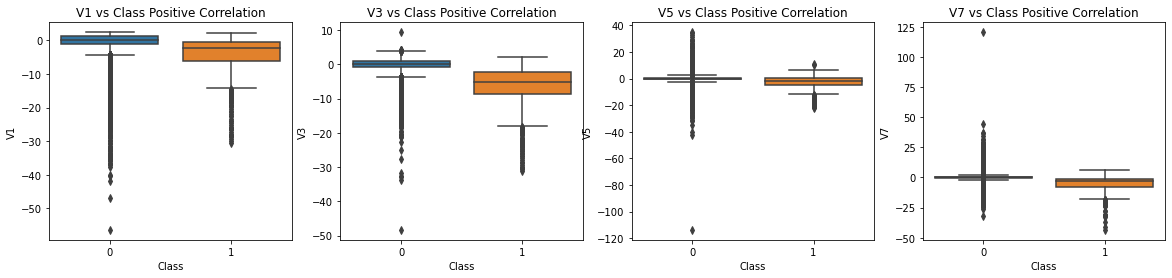

In [79]:
figure, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class",y="V1",data = df,ax=axes[0])
axes[0].set_title('V1 vs Class Positive Correlation')


sns.boxplot(x="Class",y="V3",data = df,ax=axes[1])
axes[1].set_title('V3 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V5",data = df,ax=axes[2])
axes[2].set_title('V5 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V7",data = df,ax=axes[3])
axes[3].set_title('V7 vs Class Positive Correlation')

plt.show

In [19]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df['Time']=df.index.values

In [61]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Tmin'] = (timedelta.dt.components.minutes).astype(int)
df['Thour'] = (timedelta.dt.components.hours).astype(int)

In [62]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Amount,Class,Time,Time_min,Time_hour,Tmin,Thour
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,0,0,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.125895,-0.008983,0.014724,2.69,0,0.0,0,0,0,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0,0,0,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.221929,0.062723,0.061458,123.50,0,1.0,0,0,0,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.502292,0.219422,0.215153,69.99,0,2.0,0,0,0,0


- Finding how tranctions are taking place by hour

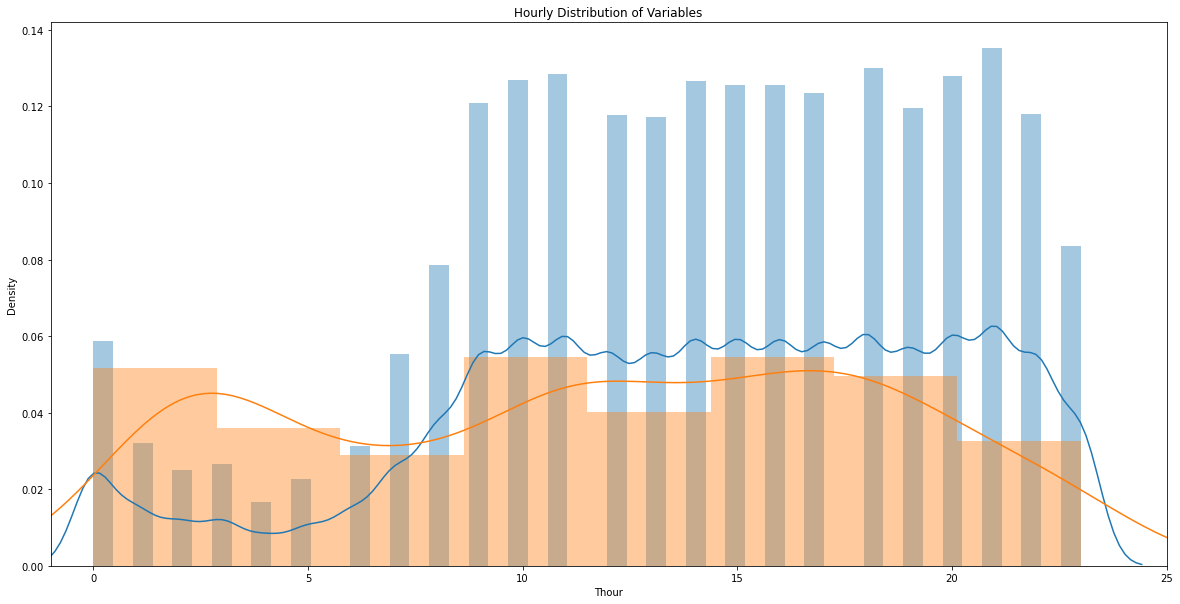

In [68]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Class'] == 0]["Thour"])
sns.distplot(df[df['Class'] == 1]["Thour"])
plt.title('Hourly Distribution of Variables')
plt.xlim([-1,25])
plt.show()

- Finding how transctions are taking place by min

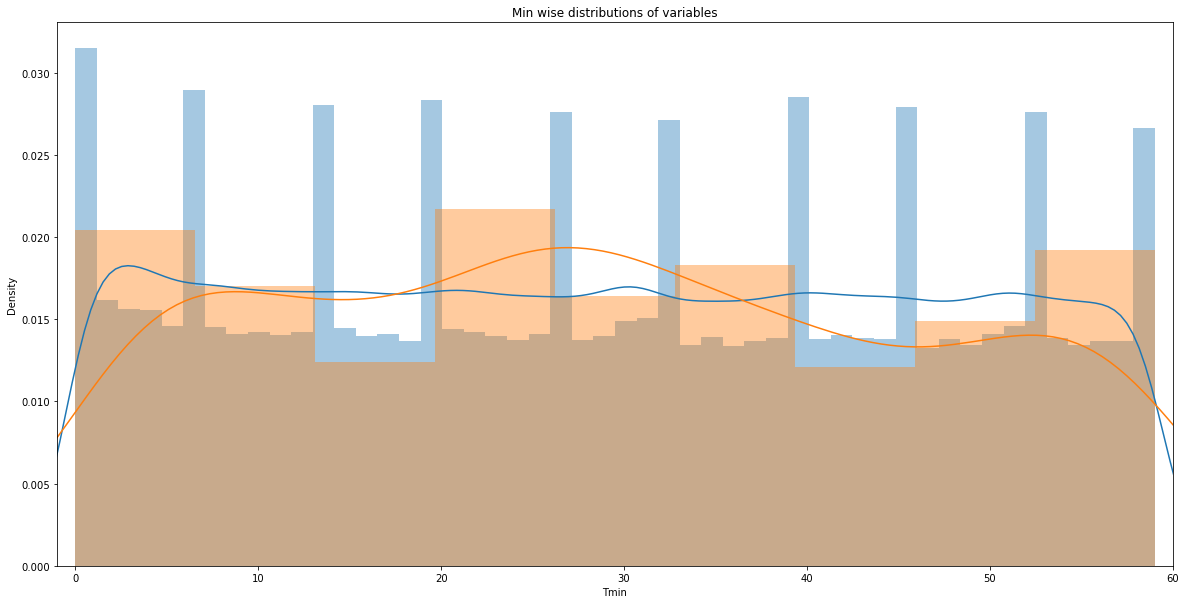

In [69]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Class'] == 0]["Tmin"])
sns.distplot(df[df['Class'] == 1]["Tmin"])
plt.title('Min wise distributions of variables')
plt.xlim([-1,60])
plt.show()

- Finding the correlation in variables

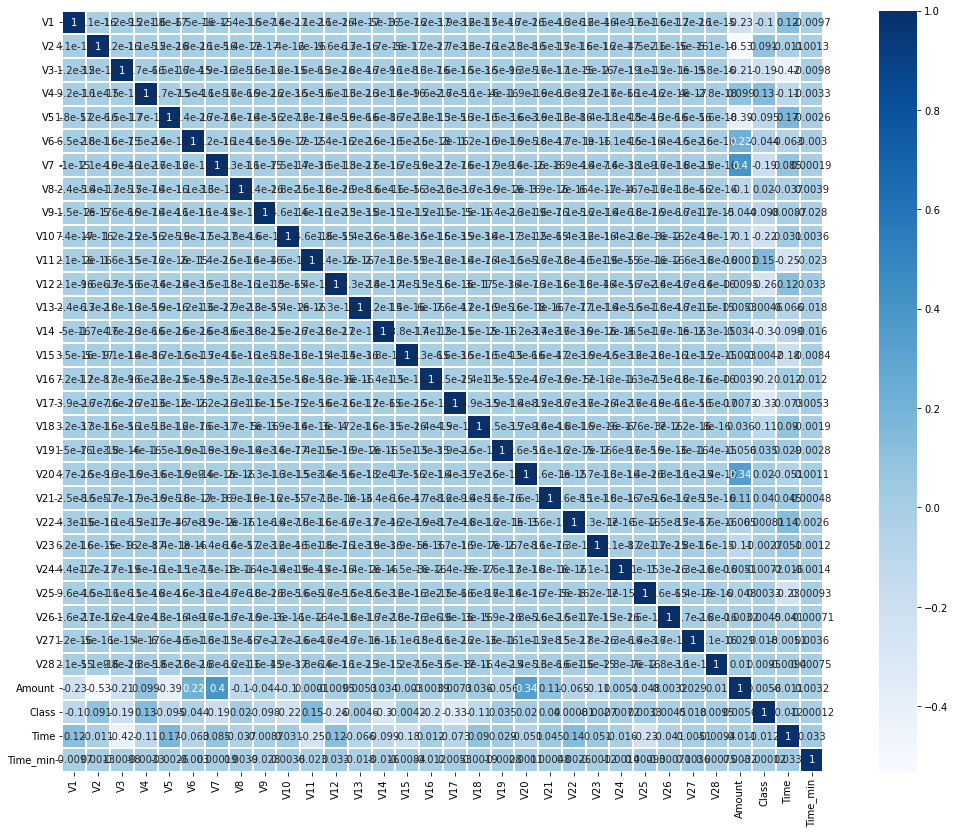

In [70]:
colormap = plt.cm.Blues
plt.figure(figsize=(20,14))

# Plotting heatmap excluding hours and min
sns.heatmap(df.iloc[:,:-3].corr(),linewidths=0.1,vmax=1.0, square=True, cmap = colormap,linecolor='white', annot=True)
plt.show()

## **04. Data Modelling**

- Transform data to conduct the train test split

In [71]:
X = df.drop(["Class"], axis=1).values 
y = df["Class"].values 

In [ ]:
# Making a function for output based on accuracy, prediction, recall and beta score
def Result(true_value, pred):
    print("acc: {}".format(accuracy_score(true_value, pred)))
    print("prec: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("beta score: {}".format(fbeta_score(true_value, pred, beta=2)))# defining output 

- We make use of SMOTE and Random Forest Classifier

In [74]:
# Using Random Forest Classifier to make pipeline
# Test Size of Data be 0.30, Train data 0.70
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.30)# defining parameters for a train test split

classifier = RandomForestClassifier


smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=30))# creating a model

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)


print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)# comparing distribution
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


- Using confusion matrix to assess the performance of the model

In [75]:
print(confusion_matrix(y_test, smote_prediction))

print('\n Score {}'.format(smote_pipeline.score(X_test, y_test)))

Result(y_test, smote_prediction)

[[85297    12]
 [   23   111]]

 Score 0.9995903701883126
acc: 0.9995903701883126
prec: 0.9024390243902439
recall: 0.8283582089552238
beta score: 0.842185128983308


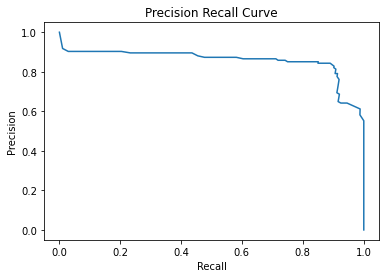

In [41]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [49]:

param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}# Assigning parameters to the model

# Making a classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [50]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [51]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7624413145539906
{'max_depth': None, 'max_features': 6, 'n_estimators': 5}


In [52]:
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [53]:
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9995234846812865


- Here we understand that the model is trained with accuracy 
- Now we predict the model

In [54]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
Result(y_test, y_pred)

[[85300     9]
 [   30   104]]
RF classification
accuracy: 0.9995435553526912
precision: 0.9203539823008849
recall: 0.7761194029850746
f2: 0.8012326656394453


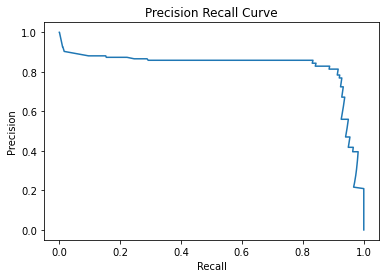

In [55]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [56]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.66666667, 0.69444444, 0.77777778, 0.72222222, 0.77142857,
       0.77142857, 0.72222222, 0.72222222, 0.75      , 0.75      ])

# **Conclusion**

I have performed a through analysis of the data given and understand the following:
1. The credit card data contains 28 variables and these variable help me identify the fradulent transactions

2. I carry out an Exploratory Data Analysis, understand the Data and plot interactive plotly graphs.

3. I understand the relationship between variables

4. I undertake SMOTE and Random Forest Classifer to predict the Frauds in transactions 

5. I have then trained the model on various parameters.

6. SMOTE and RFC give a highest accuracy of 84% on the model.  
7. I have evaluted the model using confusion matrix and ROC 